In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

# draw subgraph(a)

## loaddata

In [24]:
result = pd.read_csv('../data/fig4/raw_split_data.csv')  
result = result.groupby(['careeryear_split_point','quantile_50']).citCount.mean().reset_index()
result.sort_values(['careeryear_split_point','quantile_50'],inplace=True)

## draw 

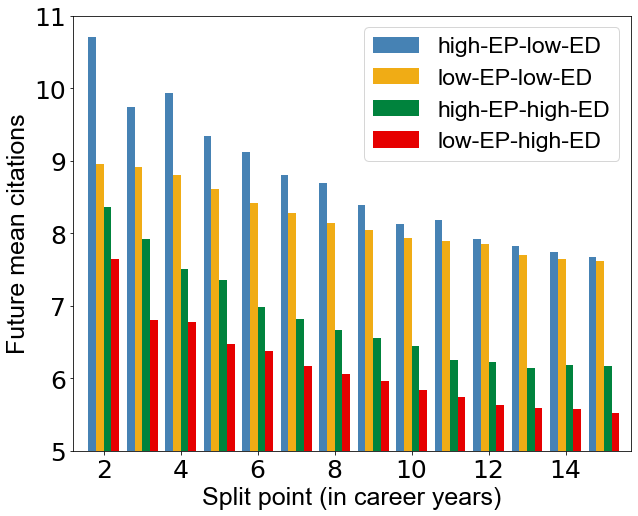

In [28]:
fontsize=25
font_conf = {'family' : 'Arial', 'weight' : 'normal', 'size': fontsize}

plt.figure(figsize=(10,8))
x=np.array(range(2,16))
width = .2
plt.bar(x - 3*width/2, result[result.quantile_50=='A'].citCount, width, label='high-EP-low-ED',color = 'steelblue')
plt.bar(x - width/2, result[result.quantile_50=='B'].citCount, width, label='low-EP-low-ED',color =(0.9411764705882353, 0.6745098039215687, 0.08235294117647059, 1.0))
plt.bar(x + width/2, result[result.quantile_50=='C'].citCount, width, label='high-EP-high-ED',color =  (0.0, 0.5137254901960784, 0.23921568627450981, 1.0))
plt.bar(x + 3*width/2, result[result.quantile_50=='D'].citCount, width, label='low-EP-high-ED',color =  (0.9019607843137255, 0.0, 0.0, 1.0))

plt.ylabel('Future mean citations',fontdict=font_conf)
plt.xlabel('Split point (in career years)',fontdict=font_conf)
plt.yticks(fontsize =fontsize)
plt.xticks(fontsize =fontsize)
plt.ylim(5,11)
plt.xlim(1.2,15.7)
plt.legend(prop={'family' : 'Arial', 'weight' : 'normal', 'size': fontsize-2}, loc='best' )

plt.savefig('./draw/figure_4a.png', format="png", bbox_inches="tight")

# draw subgraph(b)

In [29]:
result = pd.read_csv('../data/fig4/ATE_result_baselineC.csv')  

In [30]:
D_C = list(result['D-C'])
B_C = list(result['B-C'])
A_C = list(result['A-C'])
D_C_co,B_C_co,A_C_co = [],[],[]
D_C_left,B_C_left,A_C_left = [],[],[]
D_C_right,B_C_right,A_C_right = [],[],[]
for stri in ['D_C','B_C','A_C']:
    for i in eval(stri):
        if(i.find('~')>=0):
            i = i.split('~')
            eval(stri+'_left').append(float(i[0]))
            eval(stri+'_right').append(float(i[1]))
        else:
            eval(stri+'_co').append(float(i))

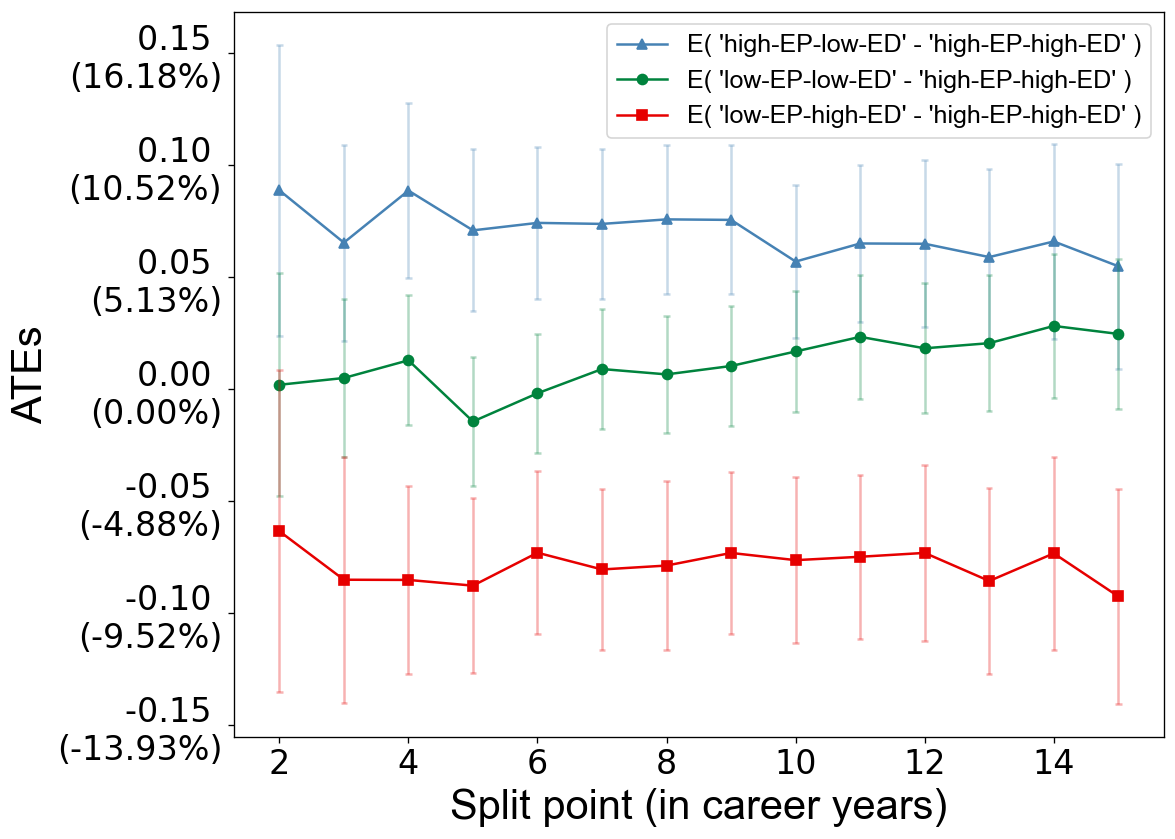

In [35]:
x_label=list(range(2,16))
fontsize=25
font_conf = {'family' : 'Arial', 'weight' : 'normal', 'size': fontsize}

fig = plt.figure(figsize=(10,8),dpi=120)  #12，6  10,8

index=2
y=A_C_co
plt.plot(x_label , y ,label ="E( 'high-EP-low-ED' - 'high-EP-high-ED' )" ,  marker ='^',color='steelblue')
y1=A_C_left
y2=A_C_right
for x_i in range(len(x_label)):
    plt.vlines(x_label[x_i], y1[x_i],y2[x_i],color="steelblue",alpha=.3)
    plt.hlines(y1[x_i], x_label[x_i]-0.05, x_label[x_i]+0.05,color="steelblue",alpha=.3)
    plt.hlines(y2[x_i], x_label[x_i]-0.05, x_label[x_i]+0.05,color="steelblue",alpha=.3)

color = (0.0, 0.5137254901960784, 0.23921568627450981, 1.0)
index=1
y=B_C_co
plt.plot(x_label , y ,label ="E( 'low-EP-low-ED' - 'high-EP-high-ED' )",  marker ='o',color=color)
y1=B_C_left
y2=B_C_right
for x_i in range(len(x_label)):
    plt.vlines(x_label[x_i], y1[x_i],y2[x_i],color=color,alpha=.3)
    plt.hlines(y1[x_i], x_label[x_i]-0.05, x_label[x_i]+0.05,color=color,alpha=.3)
    plt.hlines(y2[x_i], x_label[x_i]-0.05, x_label[x_i]+0.05,color=color,alpha=.3)

color = (0.9019607843137255, 0.0, 0.0, 1.0)
index=0
y=D_C_co
plt.plot(x_label , y ,label ="E( 'low-EP-high-ED' - 'high-EP-high-ED' )",  marker ='s',color=color)
y1=D_C_left
y2=D_C_right
for x_i in range(len(x_label)):
    plt.vlines(x_label[x_i], y1[x_i],y2[x_i],color=color,alpha=.3)
    plt.hlines(y1[x_i], x_label[x_i]-0.05, x_label[x_i]+0.05,color=color,alpha=.3)
    plt.hlines(y2[x_i], x_label[x_i]-0.05, x_label[x_i]+0.05,color=color,alpha=.3)


foo = list(plt.yticks()[0])[1:-1]
foonew=[]
for kk in (foo):
    tt = ('%.2f%%'% ((math.exp(kk)-1)*100 ) )
    foonew.append('%.2f \n(%s)'%(kk ,tt) )

plt.xticks(fontsize=fontsize-5)
plt.yticks(ticks=foo , labels=foonew ,fontsize=fontsize-5)#

plt.ylabel('ATEs',fontdict=font_conf)
plt.xlabel('Split point (in career years)',fontdict=font_conf)
plt.legend(prop={'family' : 'Arial', 'weight' : 'normal', 'size': fontsize-10},loc=1)
plt.savefig('./draw/figure_4b.png',bbox_inches = 'tight')

# draw subgraph(c)

In [48]:
result = pd.read_csv('../data/fig4/ATE_result_baselineD.csv')  
result2 = pd.read_csv('../data/fig4/ATE_A_others.csv')  
result3 = pd.read_csv('../data/fig4/null.csv')  

In [49]:
A_D = list(result['A-D'])
A_D_co = []
A_D_left = []
A_D_right = []
for stri in ['A_D']:
    for i in eval(stri):
        if(i.find('~')>=0):
            i = i.split('~')
            eval(stri+'_left').append(float(i[0]))
            eval(stri+'_right').append(float(i[1]))
        else:
            eval(stri+'_co').append(float(i))

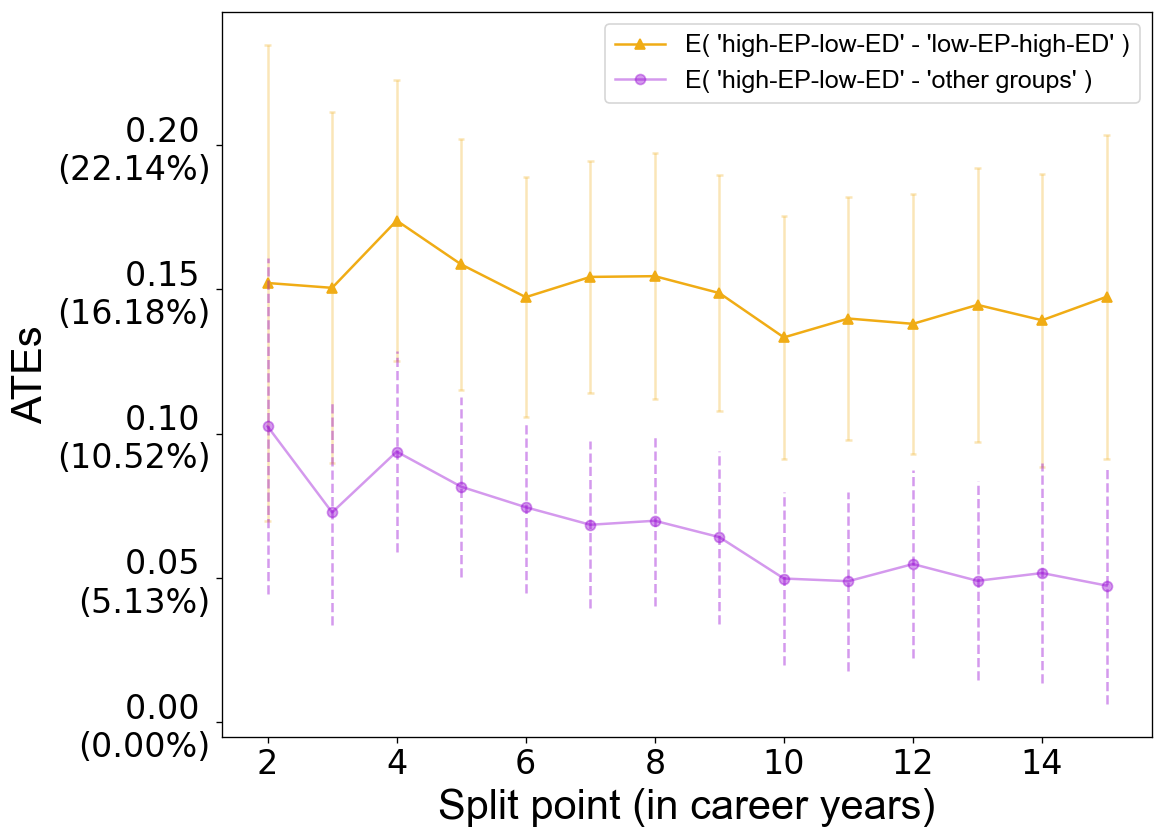

In [52]:
x_label=list(range(2,16))
fontsize=25
font_conf = {'family' : 'Arial', 'weight' : 'normal', 'size': fontsize}

fig = plt.figure(figsize=(10,8),dpi=120)  #12，6  10,8

index=2
color = (0.9411764705882353, 0.6745098039215687, 0.08235294117647059, 1.0)
y=A_D_co
plt.plot(x_label , y ,  marker ='^',color=color, label= "E( \'high-EP-low-ED\' - \'low-EP-high-ED\' )" )
y1=A_D_left
y2=A_D_right
for x_i in range(len(x_label)):
    plt.vlines(x_label[x_i], y1[x_i],y2[x_i],color=color,alpha=.3)
    plt.hlines(y1[x_i], x_label[x_i]-0.05, x_label[x_i]+0.05,color=color,alpha=.3)
    plt.hlines(y2[x_i], x_label[x_i]-0.05, x_label[x_i]+0.05,color=color,alpha=.3)

color = 'darkviolet'#(0.6, 0.4, 1.0, 1)
plt.plot( range(2,16) , result2['coe']  , 'o-',color=color ,alpha = .4 ,label ="E( 'high-EP-low-ED' - 'other groups' ) " )
y1=result2['l']
y2=result2['r']
for x_i in range(len(x_label)):
    plt.vlines(x_label[x_i], y1[x_i],y2[x_i], linestyles ="dashed",color=color  ,alpha=.4)
    
    
# plt.plot(result3['year'] , result3['mean']  , 's:',color='black' ,alpha = .2 ,label ='Null model' )
# y1=list( result3['mean']-1.96*result3['sem'] )
# y2=list( result3['mean']+1.96*result3['sem'] )
# for x_i in range(len(x_label)):
#     plt.vlines(x_label[x_i], y1[x_i],y2[x_i], linestyles ="solid",color='black' ,alpha=.2)
#     plt.hlines(y1[x_i], x_label[x_i]-0.05, x_label[x_i]+0.05, linestyles ="solid",color='black' ,alpha=.2)
#     plt.hlines(y2[x_i], x_label[x_i]-0.05, x_label[x_i]+0.05, linestyles ="solid",color='black' ,alpha=.2)

foo = list(plt.yticks()[0])[1:-1]
foonew=[]
for kk in (foo):
    tt = ('%.2f%%'% ((math.exp(kk)-1)*100 ) )
    foonew.append('%.2f \n(%s)'%(kk ,tt) )

plt.xticks(fontsize=fontsize-5)
plt.yticks(ticks=foo , labels=foonew ,fontsize=fontsize-5)#

plt.ylabel('ATEs',fontdict=font_conf)
plt.xlabel('Split point (in career years)',fontdict=font_conf)
plt.legend(prop={'family' : 'Arial', 'weight' : 'normal', 'size': fontsize-10},loc=1)
plt.savefig('./draw/figure_4c.png',bbox_inches = 'tight')

# draw subgraph(d)

In [45]:
result = pd.read_csv('../data/fig4/ATE_result_quantiles.csv')  

In [46]:
D_C = list(result['D-C'])
B_C = list(result['B-C'])
A_C = list(result['A-C'])
D_C_co,B_C_co,A_C_co = [],[],[]
D_C_left,B_C_left,A_C_left = [],[],[]
D_C_right,B_C_right,A_C_right = [],[],[]
for stri in ['D_C','B_C','A_C']:
    for i in eval(stri):
        if(i.find('~')>=0):
            i = i.split('~')
            eval(stri+'_left').append(float(i[0]))
            eval(stri+'_right').append(float(i[1]))
        else:
            eval(stri+'_co').append(float(i))

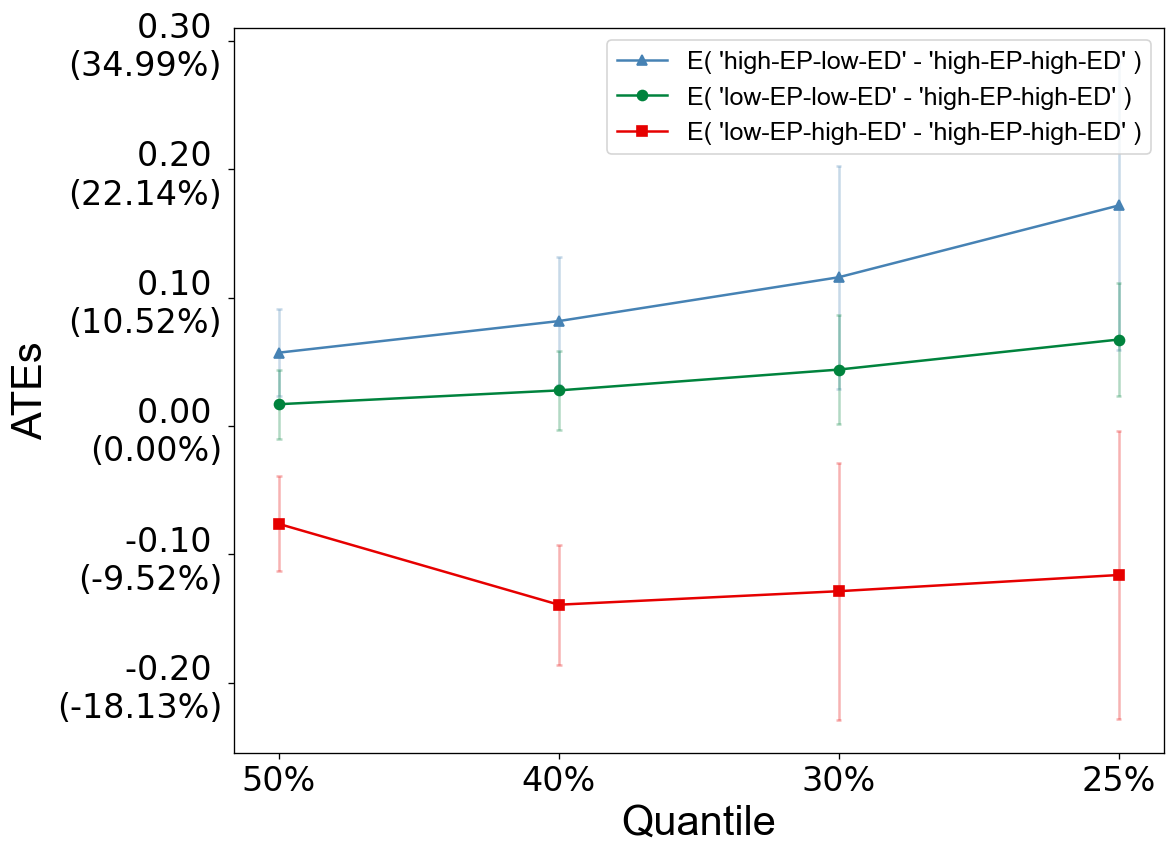

In [47]:
x_label_name=['50%','40%','30%','25%']
x_label = list(range(len(x_label_name)))

fontsize=25
font_conf = {'family' : 'Arial', 'weight' : 'normal', 'size': fontsize}

fig = plt.figure(figsize=(10,8),dpi=120)  #12，6  10,8

index=2
y=A_C_co
plt.plot(x_label_name , y ,label ="E( 'high-EP-low-ED' - 'high-EP-high-ED' )" ,  marker ='^',color='steelblue')
y1=A_C_left
y2=A_C_right
for x_i in range(len(x_label)):
    plt.vlines(x_label[x_i], y1[x_i],y2[x_i],color="steelblue",alpha=.3)
    plt.hlines(y1[x_i], x_label[x_i]-0.01, x_label[x_i]+0.01,color="steelblue",alpha=.3)
    plt.hlines(y2[x_i], x_label[x_i]-0.01, x_label[x_i]+0.01,color="steelblue",alpha=.3)

color = (0.0, 0.5137254901960784, 0.23921568627450981, 1.0)
index=1
y=B_C_co
plt.plot(x_label_name , y ,label ="E( 'low-EP-low-ED' - 'high-EP-high-ED' )",  marker ='o',color=color)
y1=B_C_left
y2=B_C_right
for x_i in range(len(x_label)):
    plt.vlines(x_label[x_i], y1[x_i],y2[x_i],color=color,alpha=.3)
    plt.hlines(y1[x_i], x_label[x_i]-0.01, x_label[x_i]+0.01,color=color,alpha=.3)
    plt.hlines(y2[x_i], x_label[x_i]-0.01, x_label[x_i]+0.01,color=color,alpha=.3)

color = (0.9019607843137255, 0.0, 0.0, 1.0)
index=0
y=D_C_co
plt.plot(x_label_name , y ,label ="E( 'low-EP-high-ED' - 'high-EP-high-ED' )",  marker ='s',color=color)
y1=D_C_left
y2=D_C_right
for x_i in range(len(x_label)):
    plt.vlines(x_label[x_i], y1[x_i],y2[x_i],color=color,alpha=.3)
    plt.hlines(y1[x_i], x_label[x_i]-0.01, x_label[x_i]+0.01,color=color,alpha=.3)
    plt.hlines(y2[x_i], x_label[x_i]-0.01, x_label[x_i]+0.01,color=color,alpha=.3)


foo = list(plt.yticks()[0])[1:-1]
foonew=[]
for kk in (foo):
    tt = ('%.2f%%'% ((math.exp(kk)-1)*100 ) )
    foonew.append('%.2f \n(%s)'%(kk ,tt) )

plt.xticks(fontsize=fontsize-5)
plt.yticks(ticks=foo , labels=foonew ,fontsize=fontsize-5)#
plt.ylabel('ATEs',fontdict=font_conf)
plt.xlabel('Quantile',fontdict=font_conf)
plt.legend(prop={'family' : 'Arial', 'weight' : 'normal', 'size': fontsize-10},loc=1)
plt.savefig('./draw/figure_4d.png',bbox_inches = 'tight')